In [1]:
!pip3 install tensorflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 3.7 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 9.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 11.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#importamos librerias para el experimento
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
# importamos ssl para el error de importacion de datasets
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [15]:
# importamos el dataset y le pasamos las variables
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

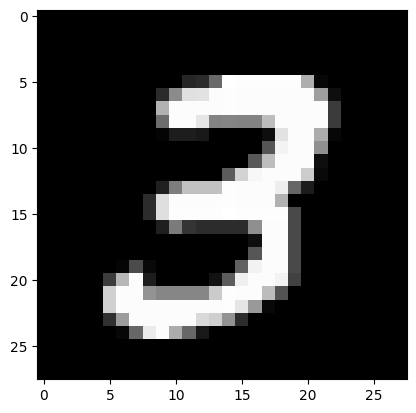

In [16]:
#graficamos las imagenes que tiene el dataset
plt.imshow(train_images[7], cmap ='gray')

In [17]:
# pasamos las imagenes a un lenguaje que l amáquina entienda(escala de grises)
train_images = train_images.reshape((60000, 28,28,1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28,28,1)).astype('float32') / 255

In [18]:
train_labels[7]

3

In [19]:
#covertimos etiquetas en array "to_categorical", es como un Onehotencoder que pertenece a tensoflow
train_labels= to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
#mostramos el array que contiene ese digito
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
])

/Users/andresrojo/Desktop/Bootcamp/mi_entorno/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(layers.Flatten())

In [23]:
model.add(layers.Dense(64, activation= 'relu'))

In [24]:
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.8688 - loss: 0.4365
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9833 - loss: 0.0542
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9893 - loss: 0.0342


In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9846 - loss: 0.0452


In [28]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9879000186920166


In [29]:
# salvamos en h5 el modelo
model.save('mnist_model.h5')

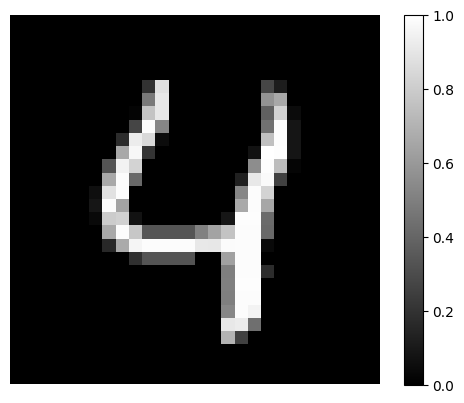

In [30]:
imagen = test_images[4].reshape(28,28)
plt.imshow(imagen, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

In [31]:
test_images[4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [32]:
#cargamos el modelo
from tensorflow.keras.models import load_model
import numpy as np

modelo_cargado= load_model('mnist_model.h5')


In [33]:
nueva_imagen = test_images[4]
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [35]:
prediction = modelo_cargado.predict(nueva_imagen)
digito = np.argmax(prediction)
print(f'El modelo predice que el digito es un : {digito}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
El modelo predice que el digito es un : 4


In [36]:
!pip3 install netron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.6 MB/s eta 0:00:0000:0100:01


In [37]:
# instalamos netron para la visualización de la caja negra
import netron
netron.start('mnist_model.h5')

Serving 'mnist_model.h5' at http://localhost:8080


('localhost', 8080)

In [38]:
!pip3 install gradio==3.50.2

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55

In [ ]:
# intalamos gradio para hacer pruebas de testeo de números
import gradio as gr 
import tensorflow as tf 
import numpy as np 

modelo = tf.keras.models.load_model("mnist_model.h5")

def clasificar_imagenes(img):
    img = np.reshape(img, (1, 28, 28, 1)).astype("float32") / 255
    predicciones = modelo.predict(img)
    digito_predicho = np.argmax(predicciones)
    return str(digito_predicho)

interfaz = gr.Interface(fn=clasificar_imagenes , inputs="sketchpad", outputs="label")
interfaz.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.29.0 is available, please upgrade.
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
